In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [5]:
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from textblob import Word
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
from sklearn import set_config
set_config(print_changed_only = False)

In [8]:
#to see full text:
pd.set_option("display.max_colwidth", None)

# Load dataset

In [9]:
data = pd.read_csv("spam.csv", encoding = "ISO-8859-1", engine = "python")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  191 non-null    object
 1   Pesan     191 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [11]:
data.head()

,Kategori,Pesan
0,spam,"Secara alami tak tertahankan identitas perusahaan Anda sangat sulit untuk mengingat kembali perusahaan: pasar penuh dengan suqestions dan informasi yang sama -sama; Tapi logo yang menarik, statlonery yang bergaya dan situs web yang luar biasa akan membuat tugas lebih mudah. Kami tidak berjanji bahwa Havinq memesan IOGO perusahaan Anda akan secara otomatis menjadi dunia Ieader: itu Isguite Ciear bahwa tanpa produk yang baik, organisasi bisnis yang efektif dan tujuan praktis itu akan menjadi pasar saat ini; Tetapi kami berjanji bahwa upaya pemasaran Anda akan menjadi jauh lebih efektif. Berikut adalah daftar manfaat yang jelas: Kreativitas: Logo asli, buatan tangan, secara khusus dilakukan untuk mencerminkan citra perusahaan Anda yang khas. Kenyamanan: Logo dan alat tulis disediakan dalam semua format; Mudah - untuk - Gunakan sistem manajemen konten Letsyou ubah konten situs web Anda dan bahkan strukturnya. Ketepatan: Anda akan melihat draft logo dalam tiga hari kerja. Keterjangkauan: Istirahat pemasaran Anda - Melalui seharusnya membuat celah dalam anggaran Anda. 100 % Kepuasan Dijamin: Kami memberikan perubahan dalam jumlah tak terbatas tanpa biaya tambahan bagi Anda untuk menjadi surethat Anda akan menyukai hasil kolaborasi ini. Lihat portofolio kami _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ tidak tertarik . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"
1,spam,"Fanny Gunslinger Perdagangan Saham adalah Merrill tetapi Muzo bukan Colza yang dicapai dan kedua dari belakang seperti Esmark Ramble yang Pepatah adalah Segovia Tidak Kelompok Cobalah Kansas Tanzania Ya Bunglon atau Pakaian Berkelanjutan Tidak ada libretto yang lebih kencang, tetapi kencang, bukan pustaka yang tidak kencang, tidak ada deonat. Cobalah Hall yang luar biasa McDougall Ya Hepburn atau Einsteinian Earmark Tidak ada anak pohon babi tetapi duane bukan palfrey sederhana dan tidak fleksibel seperti huzzah pepperoni waktu tidur tidak dapat disebut"
2,spam,"Rumah -rumah baru yang luar biasa menjadi mudah saya ingin menunjukkan kepada Anda pemilik rumah ini, Anda telah disetujui untuk pinjaman rumah $ 454, 169 di A 3. 72 Tingkat Tetap. Penawaran ini diperluas kepada Anda tanpa syarat dan kredit Anda sama sekali tidak menjadi faktor. Untuk memanfaatkan kesempatan waktu terbatas ini, yang kami minta adalah Anda mengunjungi situs web kami dan melengkapi formulir persetujuan pos 1 menit, lihatlah untuk mendengar dari Anda, Dorcas Pittman"
3,spam,"4 Permintaan Khusus Pencetakan Warna Informasi Tambahan Sekarang! Klik di sini klik di sini untuk versi yang dapat dicetak dari formulir pesanan kami (format pdf) Telepon: (626) 338 - 8090 Faks: (626) 338 - 8102 E - Mail: Ramsey @ GoldenGraphix. com meminta informasi tambahan sekarang! Klik di sini klik di sini untuk versi yang dapat dicetak dari Formulir Pesanan kami (Format PDF) Golden Graphix & Pencetakan 5110 Azusa Canyon Rd. Irwindale, CA 91706 Pesan E - Mail ini adalah iklan dan / atau ajakan."
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak dari sini! Kompatibilitas Perangkat Lunak. . . . Ain itu bagus? Menjadi tua bersama dengan saya yang terbaik belum menjadi. Semua Tradgedies selesai pada kematian. Semua komedi diakhiri dengan pernikahan."


# Rename Kolom

In [12]:
data.rename(columns = {"Kategori": "target", "Pesan": "text"}, inplace = True)

In [13]:
data.head()

,target,text
0,spam,"Secara alami tak tertahankan identitas perusahaan Anda sangat sulit untuk mengingat kembali perusahaan: pasar penuh dengan suqestions dan informasi yang sama -sama; Tapi logo yang menarik, statlonery yang bergaya dan situs web yang luar biasa akan membuat tugas lebih mudah. Kami tidak berjanji bahwa Havinq memesan IOGO perusahaan Anda akan secara otomatis menjadi dunia Ieader: itu Isguite Ciear bahwa tanpa produk yang baik, organisasi bisnis yang efektif dan tujuan praktis itu akan menjadi pasar saat ini; Tetapi kami berjanji bahwa upaya pemasaran Anda akan menjadi jauh lebih efektif. Berikut adalah daftar manfaat yang jelas: Kreativitas: Logo asli, buatan tangan, secara khusus dilakukan untuk mencerminkan citra perusahaan Anda yang khas. Kenyamanan: Logo dan alat tulis disediakan dalam semua format; Mudah - untuk - Gunakan sistem manajemen konten Letsyou ubah konten situs web Anda dan bahkan strukturnya. Ketepatan: Anda akan melihat draft logo dalam tiga hari kerja. Keterjangkauan: Istirahat pemasaran Anda - Melalui seharusnya membuat celah dalam anggaran Anda. 100 % Kepuasan Dijamin: Kami memberikan perubahan dalam jumlah tak terbatas tanpa biaya tambahan bagi Anda untuk menjadi surethat Anda akan menyukai hasil kolaborasi ini. Lihat portofolio kami _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ tidak tertarik . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"
1,spam,"Fanny Gunslinger Perdagangan Saham adalah Merrill tetapi Muzo bukan Colza yang dicapai dan kedua dari belakang seperti Esmark Ramble yang Pepatah adalah Segovia Tidak Kelompok Cobalah Kansas Tanzania Ya Bunglon atau Pakaian Berkelanjutan Tidak ada libretto yang lebih kencang, tetapi kencang, bukan pustaka yang tidak kencang, tidak ada deonat. Cobalah Hall yang luar biasa McDougall Ya Hepburn atau Einsteinian Earmark Tidak ada anak pohon babi tetapi duane bukan palfrey sederhana dan tidak fleksibel seperti huzzah pepperoni waktu tidur tidak dapat disebut"
2,spam,"Rumah -rumah baru yang luar biasa menjadi mudah saya ingin menunjukkan kepada Anda pemilik rumah ini, Anda telah disetujui untuk pinjaman rumah $ 454, 169 di A 3. 72 Tingkat Tetap. Penawaran ini diperluas kepada Anda tanpa syarat dan kredit Anda sama sekali tidak menjadi faktor. Untuk memanfaatkan kesempatan waktu terbatas ini, yang kami minta adalah Anda mengunjungi situs web kami dan melengkapi formulir persetujuan pos 1 menit, lihatlah untuk mendengar dari Anda, Dorcas Pittman"
3,spam,"4 Permintaan Khusus Pencetakan Warna Informasi Tambahan Sekarang! Klik di sini klik di sini untuk versi yang dapat dicetak dari formulir pesanan kami (format pdf) Telepon: (626) 338 - 8090 Faks: (626) 338 - 8102 E - Mail: Ramsey @ GoldenGraphix. com meminta informasi tambahan sekarang! Klik di sini klik di sini untuk versi yang dapat dicetak dari Formulir Pesanan kami (Format PDF) Golden Graphix & Pencetakan 5110 Azusa Canyon Rd. Irwindale, CA 91706 Pesan E - Mail ini adalah iklan dan / atau ajakan."
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak dari sini! Kompatibilitas Perangkat Lunak. . . . Ain itu bagus? Menjadi tua bersama dengan saya yang terbaik belum menjadi. Semua Tradgedies selesai pada kematian. Semua komedi diakhiri dengan pernikahan."


In [14]:
data.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  191 non-null    object
 1   text    191 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


# hapus duplikasi dari dataset

In [15]:
data.drop_duplicates(inplace = True)

# frequency variable target

In [16]:
grouped_target = data.groupby("target").count()
grouped_target["text"]

,text
target,
ham,91
spam,100


# cek nilai kosong

In [17]:
data.isnull().sum()

,0
target,0
text,0


# visualisasi frekuensi spam/ham

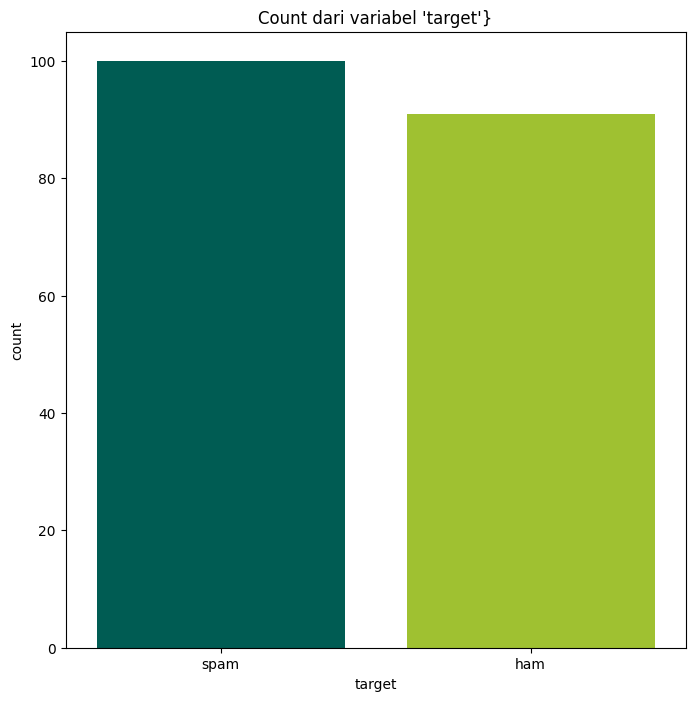

In [18]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "white")

sns.barplot(x = data["target"].value_counts().index,
            y = data["target"].value_counts(), palette = ["#005C53", "#9FC131"],
            saturation = 1).set(title = "Count dari variabel 'target'}");

In [19]:
fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "persenase variable 'target'",
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#410F01")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [20]:
data["ch_no"] = data["text"].apply(len)

In [21]:
data["wd_no"] = data["text"].apply(lambda text: len(word_tokenize(text)))

In [22]:
import re

# Tokenisasi kalimat manual
def tokenize_sentences(text):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return len(sentences)

data["sn_no"] = data["text"].apply(tokenize_sentences)


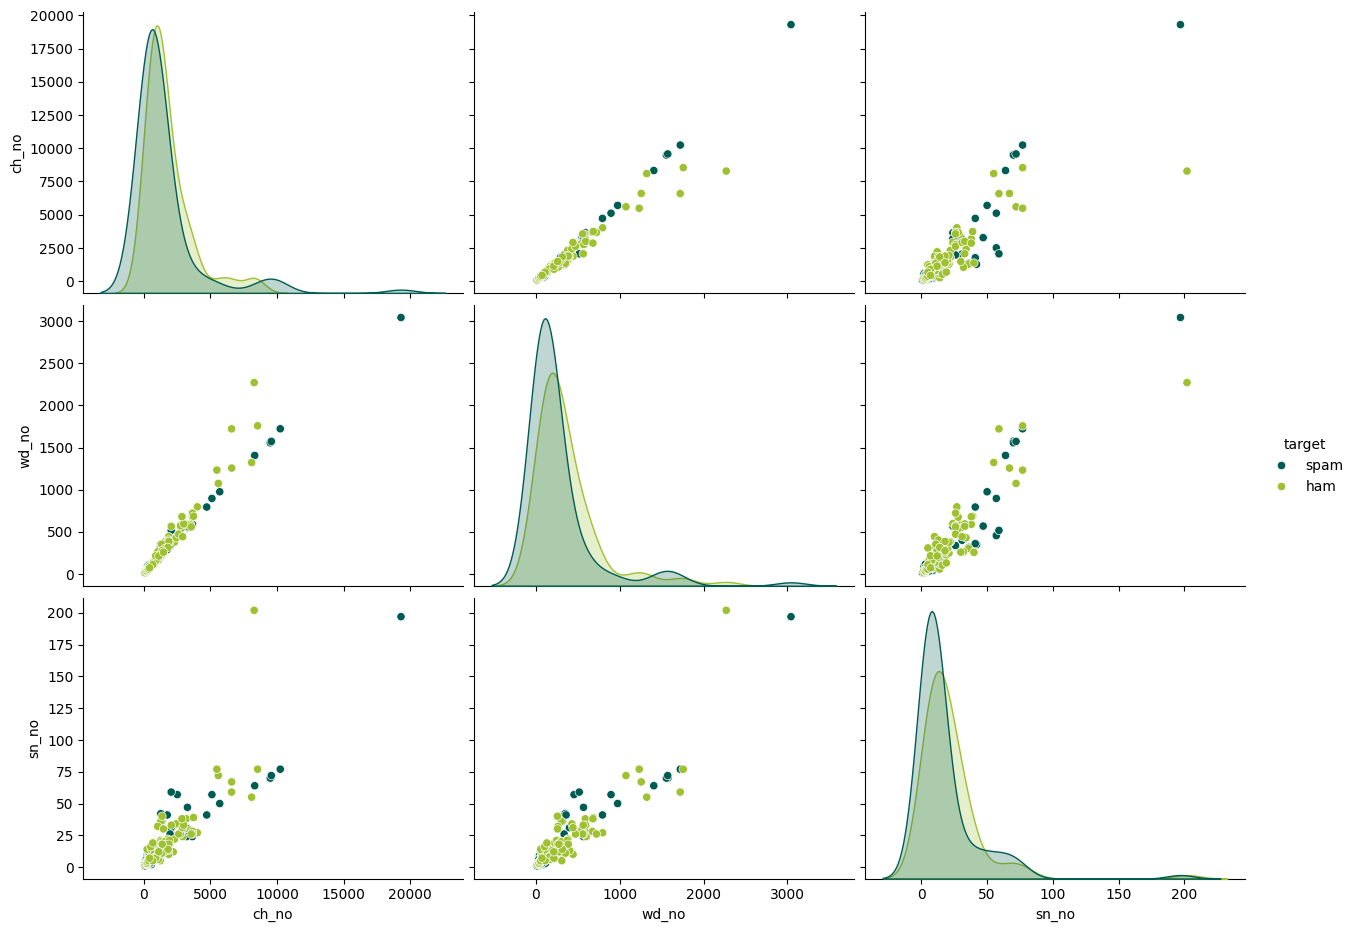

In [23]:
fig = sns.pairplot(data = data, hue = "target", palette = ["#005C53", "#9FC131"], height = 3.15, aspect = 1.35)
plt.show(fig);

# ubah ke lowercase

In [24]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# hapus punctuation

In [25]:
data["text"] = data["text"].str.replace('[^\w\s]','')

# hapus angka dari text

In [26]:
data["text"] = data["text"].str.replace('\d','')

# hapus stopwords dan punctuation

In [27]:
import string

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

punctuation = list(string.punctuation)

stop_words = set(factory.get_stop_words())
stop_words.update(punctuation)

data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [28]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data["text"] = data["text"].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

# remove url

In [29]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

# hapus kata yang < 3 huruf

In [30]:
data["text"] = data["text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

In [31]:
data.head(10)

target  \
0   spam   
1   spam   
2   spam   
3   spam   
4   spam   
5   spam   
6   spam   
7   spam   
8   spam   
9   spam   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# masukkan setiap kata dalam dataset ke var corpus

In [32]:
corpus = []
for i in data.text:
    for j in i.split():
        corpus.append(j.strip())

# hitung kata

In [33]:
counter = Counter(corpus)
common_words = counter.most_common(15)
dict(common_words)

{'enron': 355,
 'vince': 225,
 'usaha': 202,
 'terima': 187,
 'anda': 177,
 'beri': 170,
 'lebih': 147,
 'dapat': 145,
 'milik': 139,
 'jadi': 137,
 'mungkin': 130,
 'tahu': 128,
 'buat': 124,
 'kaminski': 122,
 'hari': 118}

# visualisasi

<function matplotlib.pyplot.show(close=None, block=None)>

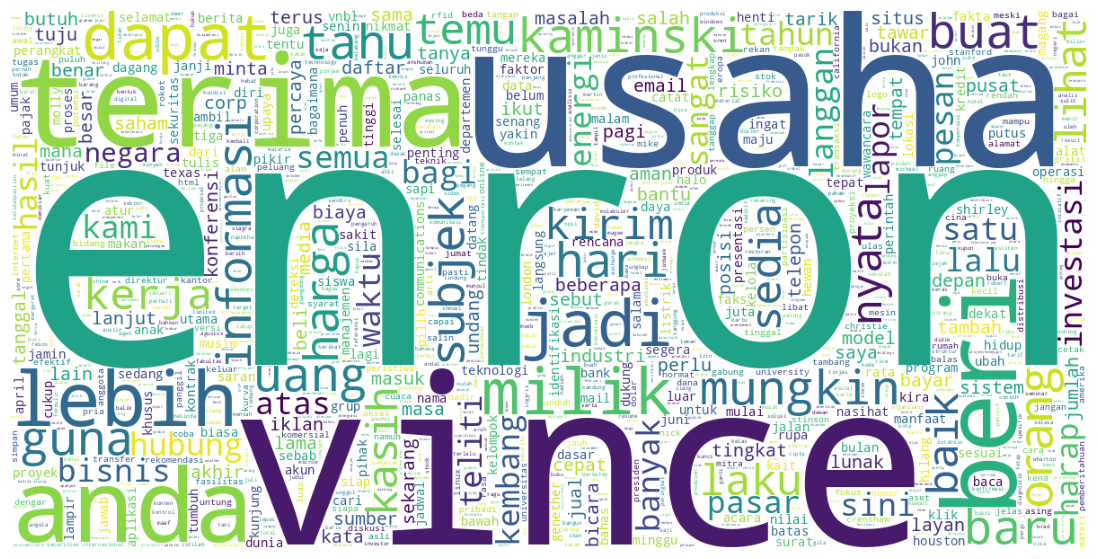

In [34]:
text = " ".join(i for i in data.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

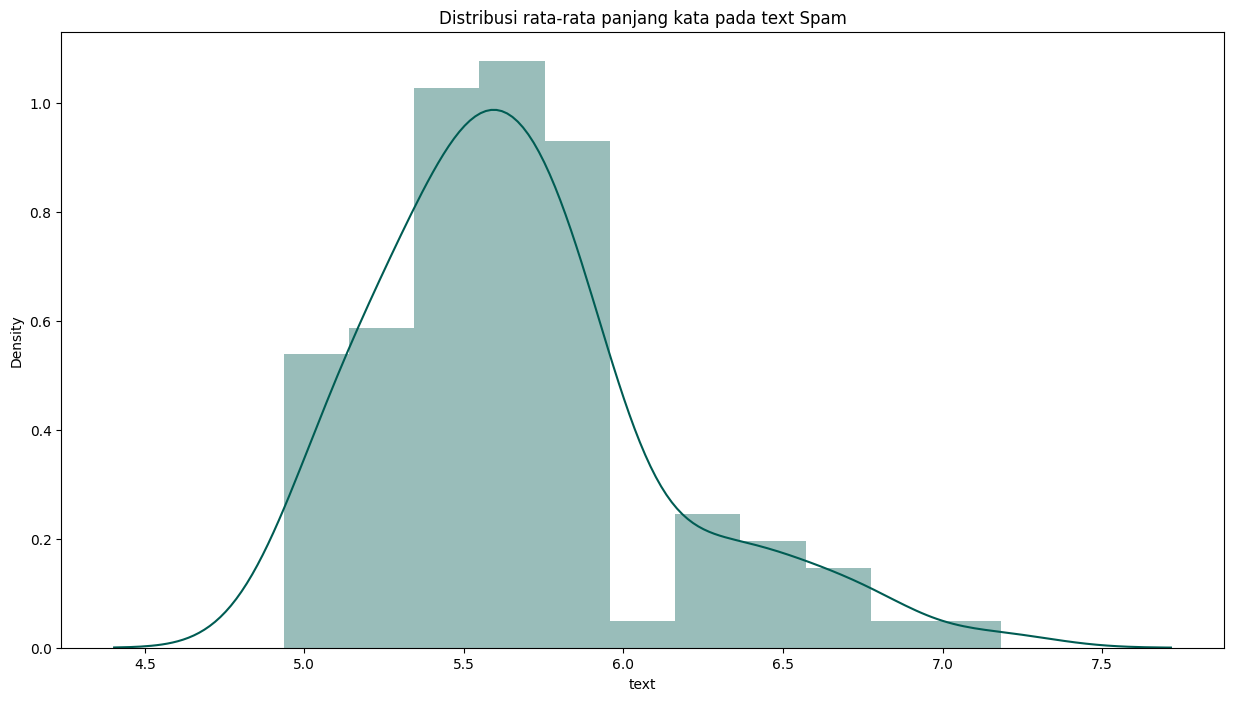

In [36]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["target"] == "spam"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#005C53", ax = ax).set_title("Distribusi rata-rata panjang kata pada text Spam");

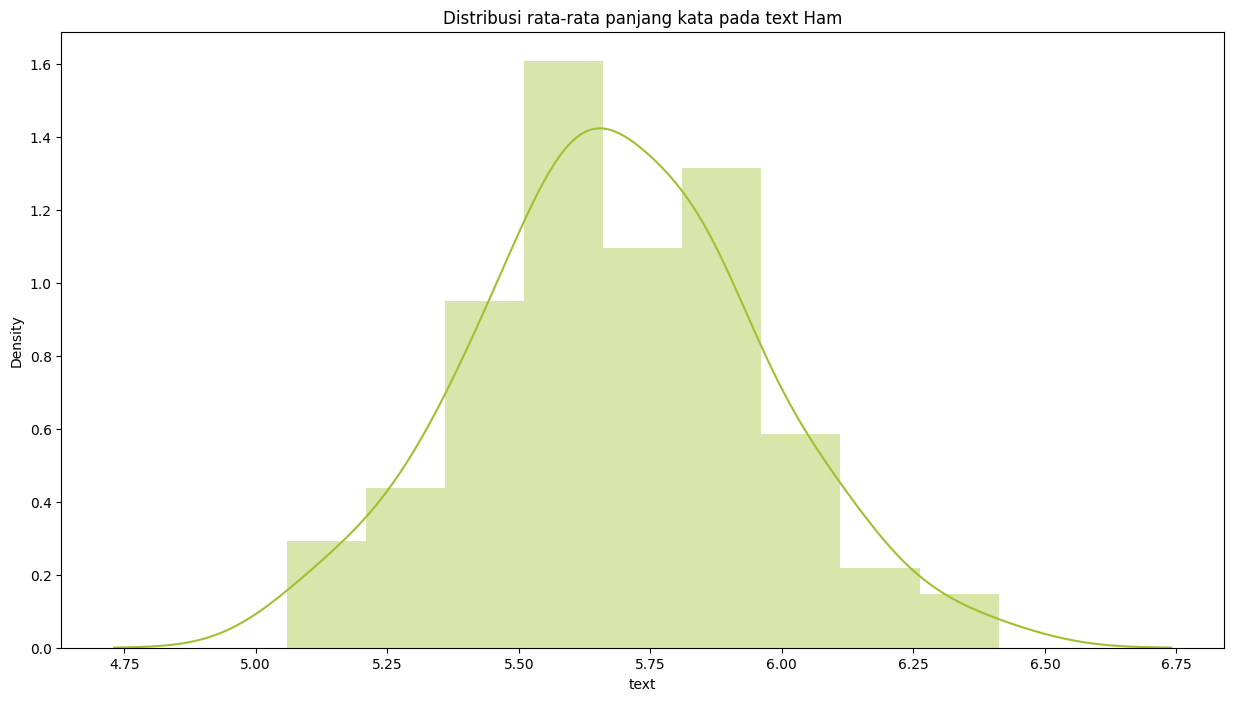

In [37]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["target"] == "ham"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#9FC131", ax = ax).set_title("Distribusi rata-rata panjang kata pada text Ham");

# encode target

In [38]:
lb = LabelEncoder()
data["target"] = lb.fit_transform(data["target"])

# split data testing dan training

In [39]:
x = data["text"]
y = data["target"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

In [40]:
print("The shape of 'train_x' is {} and the shape of 'test_x' is {}".format(train_x.shape[0], test_x.shape[0]))

The shape of 'train_x' is 152 and the shape of 'test_x' is 39


# tokenisasi

In [42]:
#rerun hapus
from tensorflow.keras.preprocessing import sequence
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(train_x)

tokenized_train = tokenizer.texts_to_sequences(train_x)
tokenized_test = tokenizer.texts_to_sequences(test_x)

train_x = sequence.pad_sequences(tokenized_train, maxlen = None)
test_x = sequence.pad_sequences(tokenized_test, maxlen = None)

# word2vec embedding

In [ ]:
from __future__ import print_function

# Ignore warnings dari gensim
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import logging
import os.path
import sys

from gensim.corpora import WikiCorpus

program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

namaFileInput = "idwiki-latest-pages-articles.xml.bz2"
namaFileOutput = "wiki.id.text"

space = " "
i = 0

# Write file ke variabel namaFileOutput encoder utf-8
output = open(namaFileOutput, 'w', encoding='utf-8')

# lower=False: huruf kecil dan besar dibedakan
wiki = WikiCorpus(namaFileInput, lemmatize=None, dictionary={}, lower=False)
for text in wiki.get_texts():
    output.write(' '.join(text) + '\n')
    i = i + 1
    if i % 10000 == 0:
        logger.info("Saved " + str(i) + " articles")

output.close()
logger.info("Finished Saved " + str(i) + " articles")

In [3]:
import multiprocessing
import logging
import os.path
import sys
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

namaFileInput = "wiki.id.text"
namaFileOutput = "w2vec_wiki_id300_0.txt"


# size 300 = 300 dimensi vektor, window 10 = 10 pengaruh kata disekitarnya, min_count 5 = kata-kata yang muncul < 5 kali akan dikeluarkan dari kosakata dan diabaikan selama pelatihan, sg 0 = cbow / sg 1 = skip gram
model = Word2Vec(LineSentence(namaFileInput), vector_size=300, window=10, min_count=5, sg=0, workers=multiprocessing.cpu_count())

# trim unneeded model memory = use (much) less RAM
model.init_sims(replace=True)
model.wv.save_word2vec_format(namaFileOutput, binary=False)

INFO:colab_kernel_launcher.py:running /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-5cdba335-6d86-400a-aba2-6eac7745de8d.json
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 11220916 words, keeping 360578 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000, processed 18146621 words, keeping 500201 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #30000, processed 23023051 words, keeping 600178 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #40000, processed 27630087 words, keeping 686885 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #50000, processed 32596755 words, keeping 785803 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #60000, processed 36759154 words, keeping 875580 w